# Import Module & dataset

In [ ]:
import pandas as pd
import numpy as np
from pandas import datetime
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import spearmanr

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold



from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import tree
import graphviz

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warning

In [ ]:
from google.colab import files
upload = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [ ]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#Mapping value target
df['y'] = df['y'].map({'no':0, 'yes':1})

In [ ]:
df_new=df.copy()

# Create Dataset New

Berdasarkan insight dari EDA, maka dataset yang baru hanya akan terdiri dari feature-feature yang memiliki korelasi terhadap target.

In [ ]:
df_new=df[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y','job','education','contact','month','poutcome']]

In [ ]:
df_new['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Text(0.5, 1.0, 'Customer with Deposito')

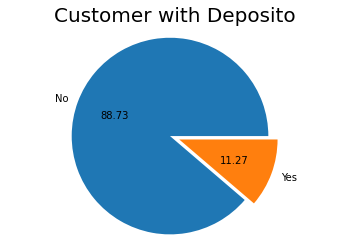

In [ ]:
plt.pie(df_new['y'].value_counts(),labels = ['No','Yes'],autopct='%.2f',explode=(0.1,0))
plt.axis('equal')
plt.title('Customer with Deposito',size = 20)

# Grouping Feature Value

## Create Age classification

In [ ]:
conditions= [(df_new['age'] >6) & (df_new['age'] <=22),
             (df_new['age'] >22) & (df_new['age'] <=38),
             (df_new['age'] >38) & (df_new['age'] <=54),
             (df_new['age'] >54) & (df_new['age'] <=73),
             (df_new['age'] >73)]
values = ['Gen Z','Millenials','Gen x','Boomers','Silent Gen']
df_new['age']=np.select(conditions,values)
df_new.head()
# Grouping age dilakukan untuk mempermudahkan interpretasi feature age
# Grouping age dibagi berdasarkan kelompok generasi 

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,month,poutcome
0,Boomers,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,housemaid,basic.4y,telephone,may,nonexistent
1,Boomers,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,services,high.school,telephone,may,nonexistent
2,Millenials,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,services,high.school,telephone,may,nonexistent
3,Gen x,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,admin.,basic.6y,telephone,may,nonexistent
4,Boomers,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,services,high.school,telephone,may,nonexistent


## Create New feature for pdays

In [ ]:
df_new['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

Dikarenakan feature pdays memiliki nilai 999 (tidak pernah dikontak)* yang cukup banyak. Maka feature pdays ini akan diolah menjadi sebuah feature baru. Pada feature baru ini, akan dibuat kategori pdays berdasarkan nilai kuartil.

*nilai 999 = tidak pernah di kontak ( dinyatakan pada informasi dataset)

In [ ]:
#Filter data pdays
df_pdays_no_999=df_new[df_new['pdays']!=999]['pdays']

In [ ]:
df_pdays_no_999.describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

In [ ]:
df_pdays_no_999.value_counts()

3     439
6     412
4     118
9      64
2      61
7      60
12     58
10     52
5      46
13     36
11     28
1      26
15     24
14     20
8      18
0      15
16     11
17      8
18      7
19      3
22      3
21      2
26      1
20      1
25      1
27      1
Name: pdays, dtype: int64

In [ ]:
conditions= [(df_new['pdays'] >=0) & (df_new['pdays'] <=3),
             (df_new['pdays'] >3) & (df_new['pdays'] <=6),
             (df_new['pdays'] >6) & (df_new['pdays'] <999),
             (df_new['pdays'] >=999)]
values = ['0-3Days','4-6 Days','7-27 Days','No Contact']
df_new['pdays_group']=np.select(conditions,values)
df_new.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,month,poutcome,pdays_group
0,Boomers,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,housemaid,basic.4y,telephone,may,nonexistent,No Contact
1,Boomers,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,services,high.school,telephone,may,nonexistent,No Contact
2,Millenials,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,services,high.school,telephone,may,nonexistent,No Contact
3,Gen x,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,admin.,basic.6y,telephone,may,nonexistent,No Contact
4,Boomers,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,services,high.school,telephone,may,nonexistent,No Contact


In [ ]:
df_new['pdays_group'].value_counts()

No Contact    39673
4-6 Days        576
0-3Days         541
7-27 Days       398
Name: pdays_group, dtype: int64

# Encoding

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
 9   y               41188 non-null  int64  
 10  job             41188 non-null  object 
 11  education       41188 non-null  object 
 12  contact         41188 non-null  object 
 13  month           41188 non-null  object 
 14  poutcome        41188 non-null  object 
 15  pdays_group     41188 non-null  object 
dtypes: float64(5), int64(4), object(7)
memory usage: 5.0+ MB


In [ ]:
df_new_enc = df_new[['job','education','contact','month','poutcome','age','pdays_group']]
df_new_enc_ohe = pd.get_dummies(df_new_enc,drop_first=True)
df_new_enc_ohe.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,age_Gen Z,age_Gen x,age_Millenials,age_Silent Gen,pdays_group_4-6 Days,pdays_group_7-27 Days,pdays_group_No Contact
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
#Menggabungkan dataset numerical dan categorical yang sudah di encode
df_new = pd.concat([df_new[['campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']],df_new_enc_ohe],axis = 1)
df_new.head()

,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,age_Gen Z,age_Gen x,age_Millenials,age_Silent Gen,pdays_group_4-6 Days,pdays_group_7-27 Days,pdays_group_No Contact
0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_new.shape

(41188, 45)

# Handling Imbalance Data

In [ ]:
#splitting dataset yes and no
df_new_yes = df_new[df_new['y']==1]
df_new_no = df_new[df_new['y']==0] 

In [ ]:
print(df_new_yes.shape)
print(df_new_no.shape)

(4640, 45)
(36548, 45)


In [ ]:
#Membuat dataset y= No dengan jumlah data sama dengan jumlah data pada dataset y=yes
train_no, test_no = train_test_split(df_new_no, test_size=0.126956331399803) #test size didapat dari 4640/36548
df_new_no_after_cut = test_no

In [ ]:
test_no.shape

(4640, 45)

Proses train test split ini berfungsi untuk memastikan data dengan y= no sama jumlahnya dengan y= yes. Tujuannya adalah menghilangkan imbalance data.

In [ ]:
df_no_imb=df_new_yes.copy()

In [ ]:
#Menggabungkan dataset y= yes dan y= no
df_no_imb = df_no_imb.append(df_new_no_after_cut, ignore_index=True)

In [ ]:
df_no_imb.shape

(9280, 45)

In [ ]:
#Create target and features untuk dataset yang sudah dilakukan handling imbalance data
X = df_no_imb.drop(columns = ['y'])
y = df_no_imb['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2020)

In [ ]:
df_no_imb['y'].value_counts()  #Bukti bahwa data sudah balanced

1    4640
0    4640
Name: y, dtype: int64

# Checking Current Score after Imbalance Data Handling

In [ ]:
#Create Classifiers 
logreg_std = LogisticRegression(random_state=42)
knn_std = KNeighborsClassifier()
dt_std = DecisionTreeClassifier(random_state=42)
rf_std= RandomForestClassifier(random_state=42)
xg_std = XGBClassifier(random_state=42)

In [ ]:
def scoring_matrix(y_test_, y_test_predict_):
    print( "accuracy: ", accuracy_score(y_test_, y_test_predict_))
    print( "precision: ", precision_score(y_test_, y_test_predict_))
    print( "recall: ", recall_score(y_test_, y_test_predict_))
    print( "f1: ", f1_score(y_test_, y_test_predict_))
    print(" ")

## Calculate Score after handling imbalance data

In [ ]:
#Train Model
logreg_std.fit(X_train,y_train)
y_pred_log_std = logreg_std.predict(X_test)
print('Logreg Classification Report')
print(classification_report(y_test,y_pred_log_std))
knn_std.fit(X_train,y_train)
y_pred_knn_std = knn_std.predict(X_test)
print('KNN Classification Report')
print(classification_report(y_test,y_pred_knn_std))
dt_std.fit(X_train,y_train)
y_pred_dt_std = dt_std.predict(X_test)
print('Decision Tree Classification Report')
print(classification_report(y_test,y_pred_dt_std))
rf_std.fit(X_train,y_train)
y_pred_rf_std = rf_std.predict(X_test)
print('Random Forest Classification Report')
print(classification_report(y_test,y_pred_rf_std))
xg_std.fit(X_train,y_train)
y_pred_xg_std = xg_std.predict(X_test)
print('XG Boost Classification Report')
print(classification_report(y_test,y_pred_xg_std))

Logreg Classification Report
              precision    recall  f1-score   support

           0       0.70      0.85      0.76       924
           1       0.80      0.63      0.71       932

    accuracy                           0.74      1856
   macro avg       0.75      0.74      0.74      1856
weighted avg       0.75      0.74      0.74      1856

KNN Classification Report
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       924
           1       0.72      0.68      0.70       932

    accuracy                           0.71      1856
   macro avg       0.71      0.71      0.71      1856
weighted avg       0.71      0.71      0.71      1856

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       924
           1       0.70      0.64      0.67       932

    accuracy                           0.68      1856
   macro avg       0.68      0.68    

In [ ]:
#List untuk memasukkan nilai matrix score dari balanced data untuk keperluan ploting
xg_score_new = []
xg_score_new.append(accuracy_score(y_test, y_pred_xg_std))
xg_score_new.append(precision_score(y_test, y_pred_xg_std))
xg_score_new.append(recall_score(y_test, y_pred_xg_std))
xg_score_new.append(f1_score(y_test, y_pred_xg_std))
log_score_new = []
log_score_new.append(accuracy_score(y_test, y_pred_log_std))
log_score_new.append(precision_score(y_test, y_pred_log_std))
log_score_new.append(recall_score(y_test, y_pred_log_std))
log_score_new.append(f1_score(y_test, y_pred_log_std))
dt_score_new = []
dt_score_new.append(accuracy_score(y_test, y_pred_dt_std))
dt_score_new.append(precision_score(y_test, y_pred_dt_std))
dt_score_new.append(recall_score(y_test, y_pred_dt_std))
dt_score_new.append(f1_score(y_test, y_pred_dt_std))
rf_score_new = []
rf_score_new.append(accuracy_score(y_test, y_pred_rf_std))
rf_score_new.append(precision_score(y_test, y_pred_rf_std))
rf_score_new.append(recall_score(y_test, y_pred_rf_std))
rf_score_new.append(f1_score(y_test, y_pred_rf_std))
knn_score_new = []
knn_score_new.append(accuracy_score(y_test, y_pred_knn_std))
knn_score_new.append(precision_score(y_test, y_pred_knn_std))
knn_score_new.append(recall_score(y_test, y_pred_knn_std))
knn_score_new.append(f1_score(y_test, y_pred_knn_std))

## Calculate score before handling imbalance data

In [ ]:
df_old = df_new.copy()
df_old.shape

(41188, 45)

df_old akan digunakan untuk melihat seberapa besar selisih nilai score sebelum dan sesudah handling imbalance data dilakukan. 

In [ ]:
#Create target and features untuk dataset raw yang belum di handling imbalance data nya
X_old = df_old.drop(columns = ['y'])
y_old = df_old['y']

In [ ]:
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, test_size = 0.2, random_state=2020,stratify=y_old)

In [ ]:
#predict datset raw dengan menggunakan model yang sudah di.fit ke datset tanpa imbalance data
y_pred_log_std_old = logreg_std.predict(X_test_old)
print('Logreg Classification Report df_old')
print(classification_report(y_test_old,y_pred_log_std_old))
y_pred_knn_std_old = knn_std.predict(X_test_old)
print('KNN Classification Report df_old')
print(classification_report(y_test_old,y_pred_knn_std_old))
y_pred_dt_std_old = dt_std.predict(X_test_old)
print('Decision Tree Classification Report df_old')
print(classification_report(y_test_old,y_pred_dt_std_old))
y_pred_rf_std_old = rf_std.predict(X_test_old)
print('Random Forest Classification Report df_old')
print(classification_report(y_test_old,y_pred_rf_std_old))
y_pred_xg_std_old = xg_std.predict(X_test_old)
print('XG Boost Classification Report df_old')
print(classification_report(y_test_old,y_pred_xg_std_old))

Logreg Classification Report df_old
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      7310
           1       0.34      0.62      0.44       928

    accuracy                           0.82      8238
   macro avg       0.64      0.73      0.67      8238
weighted avg       0.88      0.82      0.84      8238

KNN Classification Report df_old
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      7310
           1       0.27      0.74      0.39       928

    accuracy                           0.74      8238
   macro avg       0.61      0.74      0.61      8238
weighted avg       0.88      0.74      0.79      8238

Decision Tree Classification Report df_old
              precision    recall  f1-score   support

           0       0.97      0.73      0.84      7310
           1       0.28      0.84      0.43       928

    accuracy                           0.74      8238
   macro avg    

In [ ]:
#List untuk memasukkan nilai matrix score dari imbalanced data untuk keperluan ploting
xg_score_old = []
xg_score_old.append(accuracy_score(y_test_old, y_pred_xg_std_old))
xg_score_old.append(precision_score(y_test_old, y_pred_xg_std_old))
xg_score_old.append(recall_score(y_test_old, y_pred_xg_std_old))
xg_score_old.append(f1_score(y_test_old, y_pred_xg_std_old))
log_score_old = []
log_score_old.append(accuracy_score(y_test_old, y_pred_log_std_old))
log_score_old.append(precision_score(y_test_old, y_pred_log_std_old))
log_score_old.append(recall_score(y_test_old, y_pred_log_std_old))
log_score_old.append(f1_score(y_test_old, y_pred_log_std_old))
dt_score_old = []
dt_score_old.append(accuracy_score(y_test_old, y_pred_dt_std_old))
dt_score_old.append(precision_score(y_test_old, y_pred_dt_std_old))
dt_score_old.append(recall_score(y_test_old, y_pred_dt_std_old))
dt_score_old.append(f1_score(y_test_old, y_pred_dt_std_old))
rf_score_old = []
rf_score_old.append(accuracy_score(y_test_old, y_pred_rf_std_old))
rf_score_old.append(precision_score(y_test_old, y_pred_rf_std_old))
rf_score_old.append(recall_score(y_test_old, y_pred_rf_std_old))
rf_score_old.append(f1_score(y_test_old, y_pred_rf_std_old))
knn_score_old = []
knn_score_old.append(accuracy_score(y_test_old, y_pred_knn_std_old))
knn_score_old.append(precision_score(y_test_old, y_pred_knn_std_old))
knn_score_old.append(recall_score(y_test_old, y_pred_knn_std_old))
knn_score_old.append(f1_score(y_test_old, y_pred_knn_std_old))

## Comparing Model Score before and after handling imbalance data

In [ ]:
labels = ['Accuracy','Precision','Recall','f1_score']

In [ ]:
log_df = pd.DataFrame({'Scoring': labels, 'New':log_score_new,'Old':log_score_old})  
knn_df = pd.DataFrame({'Scoring': labels, 'New':knn_score_new,'Old':knn_score_old})  
dt_df = pd.DataFrame({'Scoring': labels, 'New':dt_score_new,'Old':dt_score_old})  
rf_df = pd.DataFrame({'Scoring': labels, 'New':rf_score_new,'Old':rf_score_old})  
xg_df = pd.DataFrame({'Scoring': labels, 'New':xg_score_new,'Old':xg_score_old})

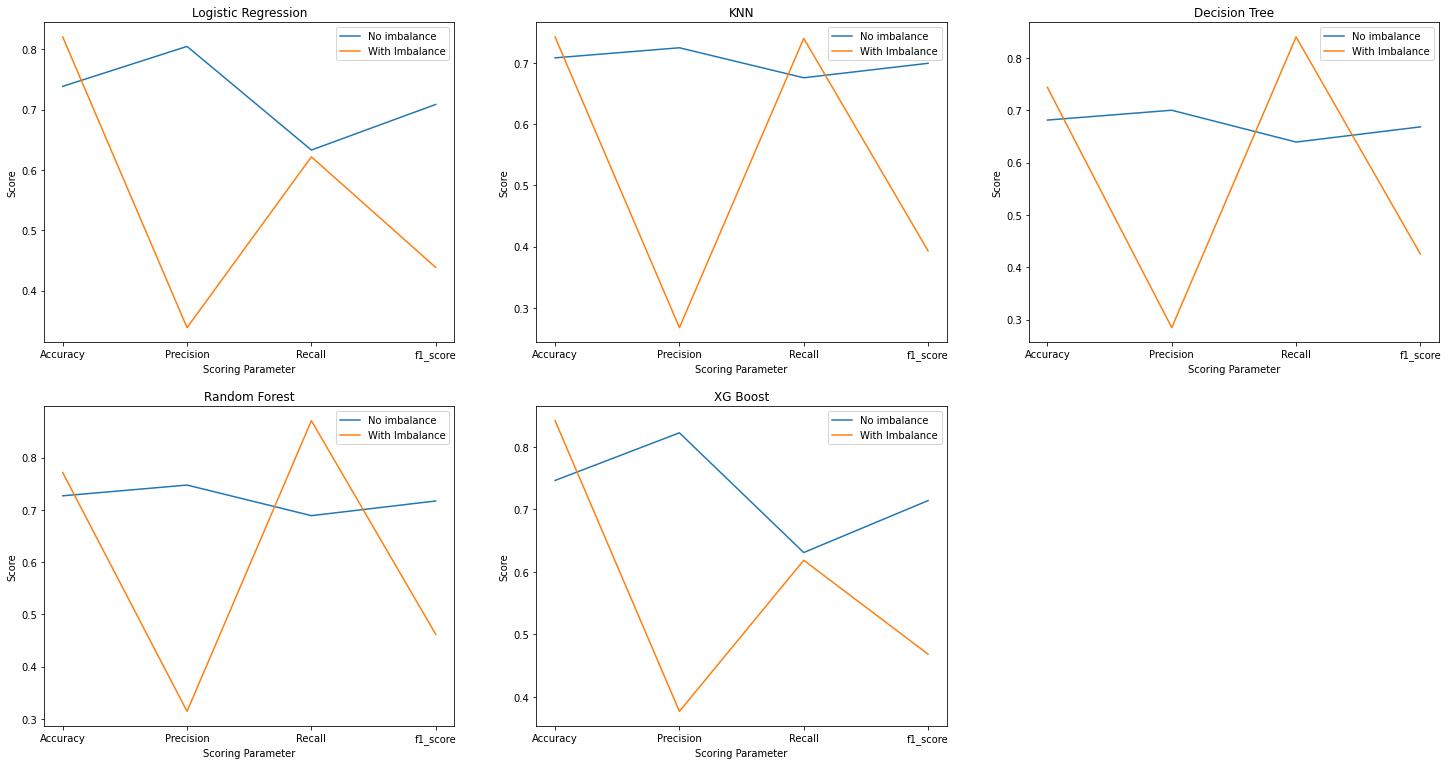

In [ ]:
#Grafik perbandingan nilai scoring methods dari imbalance dataset dengan balanced dataset per estimator
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.lineplot(data=log_df,x='Scoring',y='New')
sns.lineplot(data=log_df,x='Scoring',y='Old')
plt.xlabel('Scoring Parameter')
plt.ylabel('Score')
plt.title('Logistic Regression')
plt.legend(['No imbalance','With Imbalance'])
plt.subplot(3,3,2)
sns.lineplot(data=knn_df,x='Scoring',y='New')
sns.lineplot(data=knn_df,x='Scoring',y='Old')
plt.xlabel('Scoring Parameter')
plt.ylabel('Score')
plt.title('KNN')
plt.legend(['No imbalance','With Imbalance'])
plt.subplot(3,3,3)
sns.lineplot(data=dt_df,x='Scoring',y='New')
sns.lineplot(data=dt_df,x='Scoring',y='Old')
plt.xlabel('Scoring Parameter')
plt.ylabel('Score')
plt.title('Decision Tree')
plt.legend(['No imbalance','With Imbalance'])
plt.subplot(3,3,4)
sns.lineplot(data=rf_df,x='Scoring',y='New')
sns.lineplot(data=rf_df,x='Scoring',y='Old')
plt.xlabel('Scoring Parameter')
plt.ylabel('Score')
plt.title('Random Forest')
plt.legend(['No imbalance','With Imbalance'])
plt.subplot(3,3,5)
sns.lineplot(data=xg_df,x='Scoring',y='New')
sns.lineplot(data=xg_df,x='Scoring',y='Old')
plt.xlabel('Scoring Parameter')
plt.ylabel('Score')
plt.title('XG Boost')
plt.legend(['No imbalance','With Imbalance'])
plt.show()

In [ ]:
old_df=pd.DataFrame({'Scoring': labels,'Log':log_score_old,'KNN':knn_score_old,'DT':dt_score_old,'RF':rf_score_old,'XG': xg_score_old})  
new_df=pd.DataFrame({'Scoring': labels,'Log':log_score_new,'KNN':knn_score_new,'DT':dt_score_new,'RF':rf_score_new,'XG': xg_score_new})  

In [ ]:
old_df

,Scoring,Log,KNN,DT,RF,XG
0,Accuracy,0.820588,0.742656,0.743991,0.771304,0.841831
1,Precision,0.338615,0.267732,0.284568,0.314152,0.376888
2,Recall,0.621767,0.740302,0.840517,0.870690,0.618534
3,f1_score,0.438450,0.393246,0.425184,0.461714,0.468380


In [ ]:
new_df

,Scoring,Log,KNN,DT,RF,XG
0,Accuracy,0.738685,0.708513,0.681573,0.726832,0.746228
1,Precision,0.804911,0.724971,0.700353,0.747381,0.822378
2,Recall,0.633047,0.675966,0.639485,0.688841,0.630901
3,f1_score,0.708709,0.699611,0.668536,0.716918,0.714026


Disini kelompok kami memilih recall sebagai metode evaluasi model, dikarenakan pada case ini impact dari kasus false negative (salah mengklasifikasi orang yang akan deposit menjadi tidak deposit )lebih besar dari kasus false positive ( orang yang tidak deposit di klasifikasi menjadi orang yang akan deposit )

#Checking Underfiting / Overfitting

In [ ]:
train_accuracy = []
test_accuracy = []
metode = [logreg_std,knn_std,dt_std,rf_std,xg_std]
for i in metode:

  y_predict_train = i.predict(X_train)
  train_accuracy.append(recall_score(y_train,y_predict_train))

  y_predict_test = i.predict(X_test)
  test_accuracy.append(recall_score(y_test,y_predict_test))

In [ ]:
train_accuracy


[0.6227076591154261,
 0.7583603020496225,
 0.8942826321467098,
 0.919093851132686,
 0.6281014023732471]

In [ ]:
test_accuracy

[0.6330472103004292,
 0.6759656652360515,
 0.6394849785407726,
 0.6888412017167382,
 0.630901287553648]

In [ ]:
acc = pd.DataFrame({'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})

In [ ]:
acc['Recall_Metode'] = ['logreg_std','knn_std','dt_std','rf_std','xg_std']

In [ ]:
acc

,train_accuracy,test_accuracy,Recall_Metode
0,0.622708,0.633047,logreg_std
1,0.758360,0.675966,knn_std
2,0.894283,0.639485,dt_std
3,0.919094,0.688841,rf_std
4,0.628101,0.630901,xg_std


Text(0.5, 1.0, 'Recall')

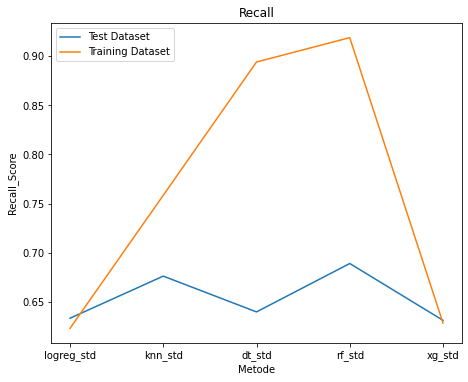

In [ ]:
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.lineplot(data=acc,x='Recall_Metode',y='test_accuracy')
sns.lineplot(data=acc,x='Recall_Metode',y='train_accuracy')
plt.xlabel('Metode')
plt.ylabel('Recall_Score')
plt.legend(['Test Dataset','Training Dataset'])
plt.title('Recall')

Berdasarkan nilai dari masing-masing model diketahui bahwa xg boost dan random forest memiliki nilai recall terbaik diantara model yang lainnya. Nilai recall random forest lebih tinggi dibanding-kan dengan XGBoost. Namun Random forest memiliki selisih yang cukup besar antara score predict train dataset dan test dataset atau dapat dikatakan overfitting. Sedangkan XGBoost tidak memiliki selisih yang signifikan. Oleh karena itu, selanjutnya kami akan menggunakan model XGBoost untuk proses deployment

#Tunning

In [ ]:
param = [{"random_state":[42],
          "learning_rate"    : np.arange(0.1,0.5,0.1),
          "gamma"            : np.arange(0,0.5,0.01),
          "colsample_bytree" : np.arange(0.1,1,0.1),
          'base_score':np.arange(0,0.6,0.01)}]
random_search = RandomizedSearchCV(XGBClassifier(), param, verbose=0,n_jobs=-1,scoring='recall')
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0

In [ ]:
random_search.best_params_

{'base_score': 0.39,
 'colsample_bytree': 0.4,
 'gamma': 0.19,
 'learning_rate': 0.30000000000000004,
 'random_state': 42}

In [ ]:
random_search.best_score_

0.6372676975457512

Nilai recall sebelum tuning sebesar 0.63 dan setelah tuning 0.0.63726. Karena kebetulan tidak memiliki perbedaan yang signifikan, maka parameter yang digunakan adalah parameter standar.

# Predict Proba dataset tanpa imbalance data

##Predict Probability

In [ ]:
prob_xg = pd.DataFrame(data = xg_std.predict_proba(X_test))

In [ ]:
prob_xg

,0,1
0,0.794457,0.205543
1,0.778346,0.221654
2,0.776048,0.223952
3,0.808120,0.191880
4,0.184721,0.815279
...,...,...
1851,0.774699,0.225301
1852,0.596222,0.403778
1853,0.658994,0.341006
1854,0.024289,0.975711


In [ ]:
prob_xg_new=prob_xg.rename(columns={0:'prob_0',1:'prob_1'})

In [ ]:
prob_xg_new

,prob_0,prob_1
0,0.794457,0.205543
1,0.778346,0.221654
2,0.776048,0.223952
3,0.808120,0.191880
4,0.184721,0.815279
...,...,...
1851,0.774699,0.225301
1852,0.596222,0.403778
1853,0.658994,0.341006
1854,0.024289,0.975711


In [ ]:
yc = pd.DataFrame({'y_test':y_test})
yc=yc.reset_index()
yc

,index,y_test
0,10,1
1,6444,0
2,5409,0
3,1011,1
4,4992,0
...,...,...
1851,6596,0
1852,7400,0
1853,7605,0
1854,3628,1


In [ ]:
yc=yc.drop(columns=(['index']))
yc

,y_test
0,1
1,0
2,0
3,1
4,0
...,...
1851,0
1852,0
1853,0
1854,1


In [ ]:
prob_xg_new = pd.concat([prob_xg_new,yc['y_test']],axis=1)
prob_xg_new

,prob_0,prob_1,y_test
0,0.794457,0.205543,1
1,0.778346,0.221654,0
2,0.776048,0.223952,0
3,0.808120,0.191880,1
4,0.184721,0.815279,0
...,...,...,...
1851,0.774699,0.225301,0
1852,0.596222,0.403778,0
1853,0.658994,0.341006,0
1854,0.024289,0.975711,1


In [ ]:
prob_xg_new['y_pred']=y_pred_xg_std
prob_xg_new

,prob_0,prob_1,y_test,y_pred
0,0.794457,0.205543,1,0
1,0.778346,0.221654,0,0
2,0.776048,0.223952,0,0
3,0.808120,0.191880,1,0
4,0.184721,0.815279,0,1
...,...,...,...,...
1851,0.774699,0.225301,0,0
1852,0.596222,0.403778,0,0
1853,0.658994,0.341006,0,0
1854,0.024289,0.975711,1,1


In [ ]:
#Filtering Data ke True Negative, False Negative, False Positive, True Positive
prob_xg_new['filter']=(prob_xg_new['y_test']*2)+(prob_xg_new['y_pred']*4)
prob_xg_new

,prob_0,prob_1,y_test,y_pred,filter
0,0.794457,0.205543,1,0,2
1,0.778346,0.221654,0,0,0
2,0.776048,0.223952,0,0,0
3,0.808120,0.191880,1,0,2
4,0.184721,0.815279,0,1,4
...,...,...,...,...,...
1851,0.774699,0.225301,0,0,0
1852,0.596222,0.403778,0,0,0
1853,0.658994,0.341006,0,0,0
1854,0.024289,0.975711,1,1,6


0 -- y_test = 0 dan y_pred = 0 True Negative

2 -- y_test = 1 dan y_pred = 0 False Negative

4 -- y_test = 0 dan y_pred = 1 False Positive

6 -- y_test = 1 dan y_pred = 1 True Positive

In [ ]:
prob_xg_new.groupby(by='filter').describe()

prob_0                                          ... y_pred                    
        count      mean       std       min       25%  ...    min  25%  50%  75%  max
filter                                                 ...                           
0       797.0  0.705724  0.079331  0.502927  0.645846  ...    0.0  0.0  0.0  0.0  0.0
2       344.0  0.665098  0.081174  0.500172  0.616724  ...    0.0  0.0  0.0  0.0  0.0
4       127.0  0.280281  0.126774  0.024104  0.185627  ...    1.0  1.0  1.0  1.0  1.0
6       588.0  0.174559  0.115889  0.019598  0.064232  ...    1.0  1.0  1.0  1.0  1.0

[4 rows x 32 columns]

## Calculate scoring_matrix untuk dataset tanpa imbalance data

In [ ]:
def scoring_matrix(y_test_, y_test_predict_):
    print( "accuracy: ", accuracy_score(y_test_, y_test_predict_))
    print( "precision: ", precision_score(y_test_, y_test_predict_))
    print( "recall: ", recall_score(y_test_, y_test_predict_))
    print( "f1: ", f1_score(y_test_, y_test_predict_))
    print(" ")

In [ ]:
df_new_pred_list = prob_xg_new.copy()

In [ ]:
kondisi_1=df_new_pred_list[(df_new_pred_list['prob_0']>=0.7)].index


#0.7 didapat dari median prob_0, alasan mengapa kita memilih median 0 = 0.7 adalah:
# 1. Kita memilih median karena median lebih robust terhadap outlier
# 2. Data awal lebih banyak nasabah yang tidak membuka deposito sehingga data lebih menggambarkan ciri customer yang tidak akan membuka deposito
# 3. Setelah model xgboost dibuat nilai predict = 0 dan actual = 0 lebih banyak dibanding yang predict =1 dan actual = 1
# 4, Karena point 3 data predict 0 nya lebih banyak, jadi kita pilih untuk mengambil threeshold valuenya dari probabilty yang 0 ( 0.7 + itu artinya tidak membuka, 0.7 kebawah itu artinya peluang dia membuka akan semakin besar)


In [ ]:
new_pred_list =[]
for i in range(len(df_new_pred_list)):
  if i in kondisi_1:
    new_pred_list.append(0)
  else:
    new_pred_list.append(1)


In [ ]:
df_new_pred_list['new_pred_list'] = new_pred_list

In [ ]:
df_new_pred_list

,prob_0,prob_1,y_test,y_pred,filter,new_pred_list
0,0.794457,0.205543,1,0,2,0
1,0.778346,0.221654,0,0,0,0
2,0.776048,0.223952,0,0,0,0
3,0.808120,0.191880,1,0,2,0
4,0.184721,0.815279,0,1,4,1
...,...,...,...,...,...,...
1851,0.774699,0.225301,0,0,0,0
1852,0.596222,0.403778,0,0,0,1
1853,0.658994,0.341006,0,0,0,1
1854,0.024289,0.975711,1,1,6,1


In [ ]:
scoring_matrix(y_test,df_new_pred_list['new_pred_list'])

accuracy:  0.6821120689655172
precision:  0.6352848101265823
recall:  0.8615879828326181
f1:  0.7313296903460839
 


Disini terlihat terdapat trade off Recall dan Precision, dimana nilai recall naik dan nilai precision menurut akibat tuning manual menggunakan filtering

* Nilai Recall dari 0.63 (standar params) naik menjadi 0,8615
* Nilai Accuracy dari 0.74 (standar params) turun menjadi 0.63	

# Predict Proba dataset Raw dengan imbalance data

##Predict Probability

In [ ]:
prob_xg_old = pd.DataFrame(data = xg_std.predict_proba(X_test_old))

In [ ]:
prob_xg_old

,0,1
0,0.636637,0.363363
1,0.836790,0.163210
2,0.798479,0.201520
3,0.724177,0.275823
4,0.634626,0.365374
...,...,...
8233,0.639672,0.360328
8234,0.797590,0.202410
8235,0.505650,0.494350
8236,0.677038,0.322962


In [ ]:
prob_xg_old=prob_xg_old.rename(columns={0:'prob_0',1:'prob_1'})
prob_xg_old

,prob_0,prob_1
0,0.636637,0.363363
1,0.836790,0.163210
2,0.798479,0.201520
3,0.724177,0.275823
4,0.634626,0.365374
...,...,...
8233,0.639672,0.360328
8234,0.797590,0.202410
8235,0.505650,0.494350
8236,0.677038,0.322962


In [ ]:
yc_old = pd.DataFrame({'y_test_old':y_test_old})
yc_old=yc_old.reset_index()
yc_old

,index,y_test_old
0,33349,0
1,11872,0
2,1184,0
3,27340,0
4,13675,0
...,...,...
8233,15780,0
8234,5168,0
8235,28069,0
8236,14128,0


In [ ]:
yc_old=yc_old.drop(columns=(['index']))
yc_old

,y_test_old
0,0
1,0
2,0
3,0
4,0
...,...
8233,0
8234,0
8235,0
8236,0


In [ ]:
prob_xg_old = pd.concat([prob_xg_old,yc_old['y_test_old']],axis=1)
prob_xg_old

,prob_0,prob_1,y_test_old
0,0.636637,0.363363,0
1,0.836790,0.163210,0
2,0.798479,0.201520,0
3,0.724177,0.275823,0
4,0.634626,0.365374,0
...,...,...,...
8233,0.639672,0.360328,0
8234,0.797590,0.202410,0
8235,0.505650,0.494350,0
8236,0.677038,0.322962,0


In [ ]:
prob_xg_old['y_pred']=y_pred_xg_std_old
prob_xg_old

,prob_0,prob_1,y_test_old,y_pred
0,0.636637,0.363363,0,0
1,0.836790,0.163210,0,0
2,0.798479,0.201520,0,0
3,0.724177,0.275823,0,0
4,0.634626,0.365374,0,0
...,...,...,...,...
8233,0.639672,0.360328,0,0
8234,0.797590,0.202410,0,0
8235,0.505650,0.494350,0,0
8236,0.677038,0.322962,0,0


In [ ]:
prob_xg_old['max']= np.maximum(prob_xg_old['y_test_old'],prob_xg_old['y_pred'])
prob_xg_old

,prob_0,prob_1,y_test_old,y_pred,max
0,0.636637,0.363363,0,0,0
1,0.836790,0.163210,0,0,0
2,0.798479,0.201520,0,0,0
3,0.724177,0.275823,0,0,0
4,0.634626,0.365374,0,0,0
...,...,...,...,...,...
8233,0.639672,0.360328,0,0,0
8234,0.797590,0.202410,0,0,0
8235,0.505650,0.494350,0,0,0
8236,0.677038,0.322962,0,0,0


In [ ]:
prob_xg_old['filter']=(prob_xg_old['y_test_old']*2)+(prob_xg_old['y_pred']*4)
prob_xg_old

,prob_0,prob_1,y_test_old,y_pred,max,filter
0,0.636637,0.363363,0,0,0,0
1,0.836790,0.163210,0,0,0,0
2,0.798479,0.201520,0,0,0,0
3,0.724177,0.275823,0,0,0,0
4,0.634626,0.365374,0,0,0,0
...,...,...,...,...,...,...
8233,0.639672,0.360328,0,0,0,0
8234,0.797590,0.202410,0,0,0,0
8235,0.505650,0.494350,0,0,0,0
8236,0.677038,0.322962,0,0,0,0


## Calculate scoring_matrix untuk dataset raw dengan imbalance data

In [ ]:
def scoring_matrix(y_test_, y_test_predict_):
    print( "accuracy: ", accuracy_score(y_test_, y_test_predict_))
    print( "precision: ", precision_score(y_test_, y_test_predict_))
    print( "recall: ", recall_score(y_test_, y_test_predict_))
    print( "f1: ", f1_score(y_test_, y_test_predict_))
    print(" ")

In [ ]:
df_old_pred_list = prob_xg_old.copy()

In [ ]:
kondisi_1=df_old_pred_list[(df_old_pred_list['prob_0']>=0.7)].index


In [ ]:
len(df_old_pred_list)

8238

In [ ]:
new_pred_list_old =[]
for i in range(len(df_old_pred_list)):
  if i in kondisi_1:
    new_pred_list_old.append(0)
  else:
    new_pred_list_old.append(1)


In [ ]:
df_old_pred_list['new_pred_list_old'] = new_pred_list_old

In [ ]:
df_old_pred_list

,prob_0,prob_1,y_test_old,y_pred,max,filter,new_pred_list_old
0,0.636637,0.363363,0,0,0,0,1
1,0.836790,0.163210,0,0,0,0,0
2,0.798479,0.201520,0,0,0,0,0
3,0.724177,0.275823,0,0,0,0,0
4,0.634626,0.365374,0,0,0,0,1
...,...,...,...,...,...,...,...
8233,0.639672,0.360328,0,0,0,0,1
8234,0.797590,0.202410,0,0,0,0,0
8235,0.505650,0.494350,0,0,0,0,1
8236,0.677038,0.322962,0,0,0,0,1


In [ ]:
scoring_matrix(y_test_old,df_old_pred_list['new_pred_list_old'])

accuracy:  0.5186938577324594
precision:  0.17351107288755108
recall:  0.8696120689655172
f1:  0.28929915755511737
 


# Kesimpulan

##Grafik Balance dataset without proba and Balance dataset with proba 

In [ ]:
new_df

,Scoring,Log,KNN,DT,RF,XG
0,Accuracy,0.738685,0.708513,0.681573,0.726832,0.746228
1,Precision,0.804911,0.724971,0.700353,0.747381,0.822378
2,Recall,0.633047,0.675966,0.639485,0.688841,0.630901
3,f1_score,0.708709,0.699611,0.668536,0.716918,0.714026


In [ ]:
new_df_list = list(new_df['XG']) #without_proba_balance_data 
new_df_list

[0.7462284482758621, 0.8223776223776224, 0.630901287553648, 0.7140255009107468]

In [ ]:
def scoring_matrix_list(y_test_, y_test_predict_):
    scoring_matrix_in_list = []

    scoring_matrix_in_list.append(accuracy_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(precision_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(recall_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(f1_score(y_test_, y_test_predict_))
    return scoring_matrix_in_list
    #Menghitung score dengan menggunakan beberapa metode kemudian memasukkannya ke list

In [ ]:
scoring_list_without_imbalance_data= scoring_matrix_list(y_test,df_new_pred_list['new_pred_list'])
scoring_list_without_imbalance_data

[0.6821120689655172,
 0.6352848101265823,
 0.8615879828326181,
 0.7313296903460839]

In [ ]:
df_1 = pd.DataFrame({'new_df_without_proba_balance_data':new_df_list,'scoring_list_with_proba_balance_data':scoring_list_without_imbalance_data})
df_1

,new_df_without_proba_balance_data,scoring_list_with_proba_balance_data
0,0.746228,0.682112
1,0.822378,0.635285
2,0.630901,0.861588
3,0.714026,0.731330


In [ ]:
df_1['Acc_Score'] = ['Accuracy','Precision','Recall_Score','F1']

In [ ]:
df_1

,new_df_without_proba_balance_data,scoring_list_with_proba_balance_data,Acc_Score
0,0.746228,0.682112,Accuracy
1,0.822378,0.635285,Precision
2,0.630901,0.861588,Recall_Score
3,0.714026,0.731330,F1


Text(0.5, 1.0, 'Scoring')

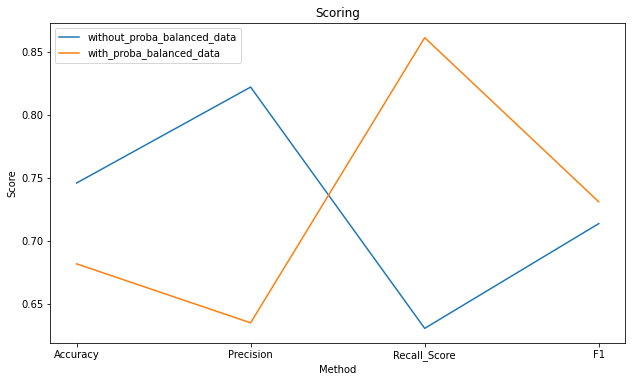

In [ ]:
plt.figure(figsize=(35, 20))
plt.subplot(3,3,1)
sns.lineplot(data=df_1,x='Acc_Score',y='new_df_without_proba_balance_data')
sns.lineplot(data=df_1,x='Acc_Score',y='scoring_list_with_proba_balance_data')
plt.xlabel('Method')
plt.ylabel('Score')
plt.legend(['without_proba_balanced_data','with_proba_balanced_data'])
plt.title('Scoring')

Grafik berikut menggambarkan perbandingan nilai score per method evaluationn terhadap balance data dengan menggunakan tuning manual (with proba) dan tanpa tuning manual (without proba) disini terlihat bahwa setelah tuning manual terdapat trade of antara nilai precision dengan recall score 

##Grafik Raw Dataset without proba and Imbalance Dataset with proba

In [ ]:
def scoring_matrix_list(y_test_, y_test_predict_):
    scoring_matrix_in_list = []

    scoring_matrix_in_list.append(accuracy_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(precision_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(recall_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(f1_score(y_test_, y_test_predict_))
    return scoring_matrix_in_list

In [ ]:
old_df

,Scoring,Log,KNN,DT,RF,XG
0,Accuracy,0.820588,0.742656,0.743991,0.771304,0.841831
1,Precision,0.338615,0.267732,0.284568,0.314152,0.376888
2,Recall,0.621767,0.740302,0.840517,0.870690,0.618534
3,f1_score,0.438450,0.393246,0.425184,0.461714,0.468380


In [ ]:
old_df_list = list(old_df['XG']) #without_proba_imbalance_data
old_df_list

[0.8418305413935421,
 0.3768877216021011,
 0.6185344827586207,
 0.46838025295797636]

In [ ]:
with_proba_imbalance_data = scoring_matrix_list(y_test_old,df_old_pred_list['new_pred_list_old'])
with_proba_imbalance_data

[0.5186938577324594,
 0.17351107288755108,
 0.8696120689655172,
 0.28929915755511737]

In [ ]:
df_2 = pd.DataFrame({'new_df_without_proba_imbalance_data':old_df_list,'scoring_list_with_proba_imbalance_data':with_proba_imbalance_data})
df_2

,new_df_without_proba_imbalance_data,scoring_list_with_proba_imbalance_data
0,0.841831,0.518694
1,0.376888,0.173511
2,0.618534,0.869612
3,0.468380,0.289299


In [ ]:
df_2['Acc_Score'] = ['Accuracy','Precision','Recall_Score','F1']
df_2

,new_df_without_proba_imbalance_data,scoring_list_with_proba_imbalance_data,Acc_Score
0,0.841831,0.518694,Accuracy
1,0.376888,0.173511,Precision
2,0.618534,0.869612,Recall_Score
3,0.468380,0.289299,F1


Text(0.5, 1.0, 'Scoring')

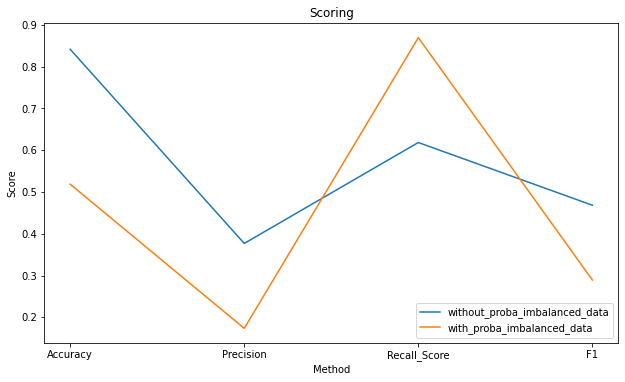

In [ ]:
plt.figure(figsize=(35, 20))
plt.subplot(3,3,1)
sns.lineplot(data=df_2,x='Acc_Score',y='new_df_without_proba_imbalance_data')
sns.lineplot(data=df_2,x='Acc_Score',y='scoring_list_with_proba_imbalance_data')
plt.xlabel('Method')
plt.ylabel('Score')
plt.legend(['without_proba_imbalanced_data','with_proba_imbalanced_data'])
plt.title('Scoring')

Grafik berikut menggambarkan perbandingan scoring method dari data imbalance yang menggunakan tuning manual (with proba) dan yang tidak (without proba) selain terlihat bahwa  trade of antara nilai precision dengan recall score setelah tuning data, grafik ini juga menunjukkan beberapa metode mempunyai score yang lebih kontras dibandingkan grafik balance data dikarenakan dataset yang digunakan pada grafik ini bersifat imbalanced

##Grafik Score Data Imbalance with proba dan Raw Data with proba

In [ ]:
def scoring_matrix_list(y_test_, y_test_predict_):
    scoring_matrix_in_list = []

    scoring_matrix_in_list.append(accuracy_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(precision_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(recall_score(y_test_, y_test_predict_))
    scoring_matrix_in_list.append(f1_score(y_test_, y_test_predict_))
    return scoring_matrix_in_list

In [ ]:
scoring_list_with_imbalance_data= scoring_matrix_list(y_test,df_new_pred_list['new_pred_list'])
scoring_list_with_imbalance_data

[0.6821120689655172,
 0.6352848101265823,
 0.8615879828326181,
 0.7313296903460839]

In [ ]:
scoring_list_without_imbalance_data= scoring_matrix_list(y_test_old,df_old_pred_list['new_pred_list_old'])
scoring_list_without_imbalance_data

[0.5186938577324594,
 0.17351107288755108,
 0.8696120689655172,
 0.28929915755511737]

In [ ]:
dataframe_before_after_scoring = pd.DataFrame({'scoring_list_with_imbalance_data': scoring_list_with_imbalance_data,'scoring_list_without_imbalance_data':scoring_list_without_imbalance_data})

In [ ]:
dataframe_before_after_scoring['Acc_Score'] = ['Accuracy','Precision','Recall_Score','F1']

In [ ]:
dataframe_before_after_scoring

,scoring_list_with_imbalance_data,scoring_list_without_imbalance_data,Acc_Score
0,0.682112,0.518694,Accuracy
1,0.635285,0.173511,Precision
2,0.861588,0.869612,Recall_Score
3,0.731330,0.289299,F1


Text(0.5, 1.0, 'Scoring')

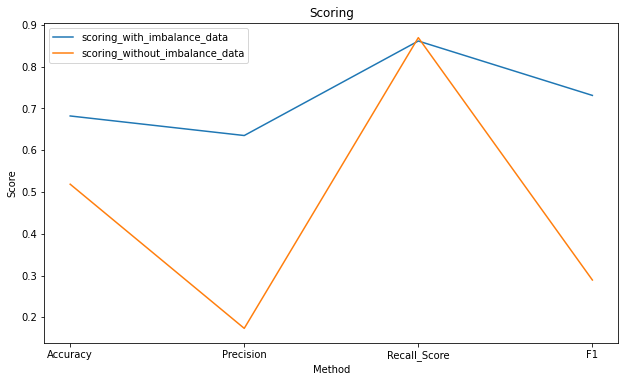

In [ ]:
plt.figure(figsize=(35, 20))
plt.subplot(3,3,1)
sns.lineplot(data=dataframe_before_after_scoring,x='Acc_Score',y='scoring_list_with_imbalance_data')
sns.lineplot(data=dataframe_before_after_scoring,x='Acc_Score',y='scoring_list_without_imbalance_data')
plt.xlabel('Method')
plt.ylabel('Score')
plt.legend(['scoring_with_imbalance_data','scoring_without_imbalance_data'])
plt.title('Scoring')

Grafik berikut menggambarkan score yang didapat menggunakan model yang telah di tuning manual dan di jalankan pada data imbalance dan balance dataset, disini terlihat bahwa recall score menjadi metode evaluation tertingggi akibat tuning manual yang telah dilakukan.